In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
FPATH = "ranks.tsv"


In [3]:
df = pd.read_csv(FPATH, sep="\t")
df.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM
0,Aceto-2005-APC,1,1,splicing|3ss|disrupted
1,Agrebi-2017-FAS,79,110,splicing|branchpoint|disrupted
2,Agrebi-2017-FAS,74,75,splicing|SRE|ESS|binding|increased
3,Aguilar-Ramirez-2009-C5,3,2,splicing|5ss|disrupted
4,Aldahmesh-2009-CTNS,1,1,splicing|5ss|disrupted


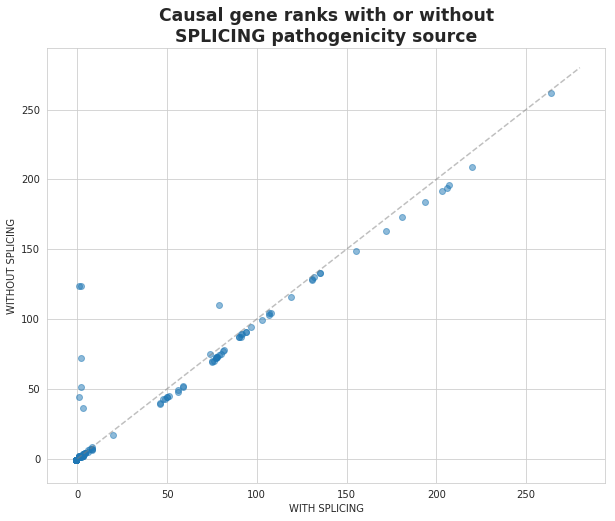

In [26]:
fig, ax = plt.subplots(figsize=(10, 8))

line_points = np.linspace(0, 280, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, alpha=0.5)
#xlim = ax.set_xlim([0, 50])
#ylim = ax.set_ylim([0, 50])

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source",
                     size="xx-large", fontweight="bold")

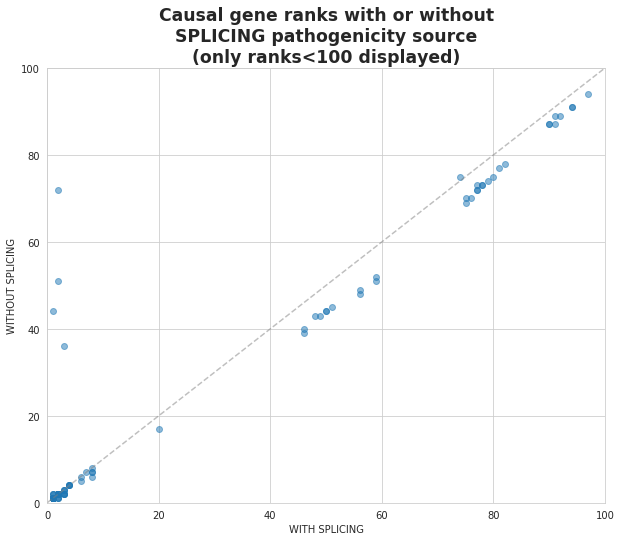

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

line_points = np.linspace(0, 280, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, alpha=0.5)
xlim = ax.set_xlim([0, 100])
ylim = ax.set_ylim([0, 100])

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source\n(only ranks<100 displayed)",
                     size="xx-large", fontweight="bold")

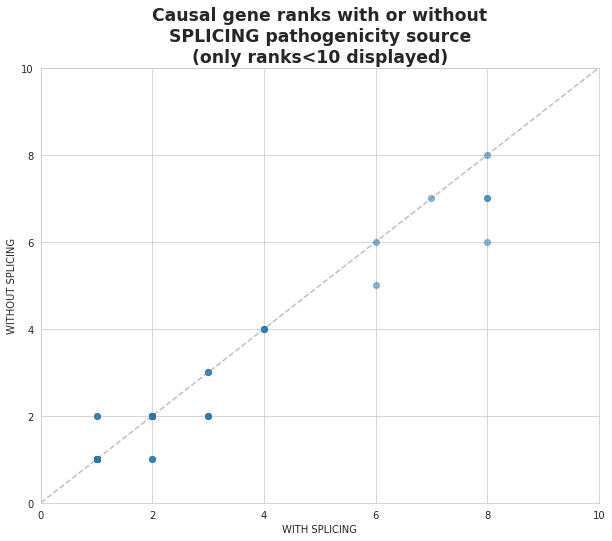

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

line_points = np.linspace(0, 280, 10)
line = ax.plot(line_points, line_points, "--", color="grey", alpha=0.5)
sct = ax.scatter(df.WITH_SPLICING, df.WITHOUT_SPLICING, alpha=0.5)
xlim = ax.set_xlim([0, 10])
ylim = ax.set_ylim([0, 10])

xl = ax.set_xlabel("WITH SPLICING")
yl = ax.set_ylabel("WITHOUT SPLICING")
title = ax.set_title("Causal gene ranks with or without\nSPLICING pathogenicity source\n(only ranks<10 displayed)",
                     size="xx-large", fontweight="bold")

In [31]:
df.loc[df.WITH_SPLICING < df.WITHOUT_SPLICING, :]

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM
1,Agrebi-2017-FAS,79,110,splicing|branchpoint|disrupted
2,Agrebi-2017-FAS,74,75,splicing|SRE|ESS|binding|increased
47,Carboni-2011-LMNA,2,124,splicing|3ss|disrupted
52,Chen-2018-LRAT,1,124,splicing|3ss|disrupted
74,Dupré-2010-ALG1,3,36,splicing|5ss|disrupted;coding|missense
118,Koppolu-2017-COL6A1,1,44,splicing|5ss|disrupted
129,Macaya-2009-TCOF1,1,2,splicing|SRE
134,Martel-2012-CYBB,2,72,splicing|5ss|disrupted
180,Pomponio-1997-BTD,1,2,splicing|3css|activated
219,von_Brederlow-2002-CDH23,1,2,splicing|3css|activated
